In [ ]:
%pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=75e61758c4d26c21ba78824692363edcfd20dfc4cda07ae5eb02c90fd825b1db
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import requests
import pandas as pd
# import pandas_ta as ta
import requests
import io
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import DataFrame
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
from IPython.display import display

keys = ['YR7C1B1NPZ97A348', 'JCQFVNBK3U8QMZ0T', 'P1Y9WYCX6JNW4N1M' ]
stocks = ('NTDOY', 'TTWO')
MY_KEY = "P1Y9WYCX6JNW4N1M"


In [ ]:
def fetch_stock_data(symbol, api_key, year_needed):

    DAILY_ENDPOINT = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}&datatype=csv"
    r = requests.get(DAILY_ENDPOINT).content
    df = pd.read_csv(io.StringIO(r.decode('utf-8')))
    df = pd.DataFrame(df)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df[df["timestamp"].dt.year>=year_needed]
    if symbol == "NTDOY":

      share_split_date = pd.to_datetime('10/04/2022')

      before_split = df[df['timestamp'] < share_split_date]
      after_split = df[df['timestamp'] >= share_split_date]

      # Divide the prices before the share split date by 5
      before_split[['open', 'high', 'low', 'close']] = before_split[['open', 'high', 'low', 'close']] / 5

      # Concatenate the adjusted data
      adjusted_df = pd.concat([after_split, before_split])
      adjusted_df.set_index('timestamp', inplace=True)
      return adjusted_df
    else:
      df.set_index('timestamp', inplace=True)
      return df



In [ ]:
ttwo_df = fetch_stock_data("TTWO", MY_KEY, 2008)


In [ ]:
ttwo_df.head(20)

,open,high,low,close,volume
timestamp,,,,,
2023-12-08,154.380,156.7225,154.0800,155.32,2078756
2023-12-07,155.100,155.8500,153.5550,154.21,2437241
2023-12-06,157.500,158.8100,156.5450,157.32,2544042
2023-12-05,154.260,157.9800,152.1200,156.76,3596960
2023-12-04,157.350,158.4500,154.5000,157.56,1878865
2023-12-01,158.690,161.6050,157.2000,157.84,1733670
2023-11-30,157.170,158.5400,156.5000,158.20,1508258
2023-11-29,157.590,158.8400,155.7400,157.01,1562460
2023-11-28,156.270,158.1700,156.2700,156.68,1324690


In [ ]:
ntdoy_df = fetch_stock_data("NTDOY", MY_KEY, 2008)

<ipython-input-3-8f06e2961d88>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_split[['open', 'high', 'low', 'close']] = before_split[['open', 'high', 'low', 'close']] / 5


In [ ]:
%pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

import matplotlib. pyplot as plt
import matplotlib

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

In [ ]:
def data_scaling(data):
  target = data['close']

  training_features = ['open', 'high', 'low', 'volume']
  scaler = StandardScaler()
  feature_transform = scaler.fit_transform(data[training_features])
  feature_transform = pd.DataFrame(columns=training_features,
                      data=feature_transform,
                      index=data.index)
  target_transform = scaler.fit_transform(target.values.reshape(-1, 1))

  return feature_transform, target_transform, scaler
feature_transform, target_transform, scaler = data_scaling(ttwo_df)
def data_split(feature_transform, target_transform):
  timesplit= TimeSeriesSplit(n_splits=5)
  for train_index, test_index in timesplit.split(feature_transform):
          X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
          y_train, y_test = target_transform[:len(train_index)], target_transform[len(train_index): (len(train_index)+len(test_index))]
  trainX =np.array(X_train)
  testX =np.array(X_test)
  X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
  X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
  return trainX, X_train, X_test, y_train, y_test
trainX, X_train, X_test, y_train, y_test =  data_split(feature_transform, target_transform)
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
history=lstm.fit(X_train, y_train, epochs=10, batch_size=8, verbose=1, shuffle=False)
y_pred= lstm.predict(X_test)
train_pred = lstm.predict(X_train)

train_predict = scaler.inverse_transform(train_pred)
test_predict = scaler.inverse_transform(y_pred)

Epoch 1/10
419/419 [==============================] - 5s 3ms/step - loss: 0.1804
Epoch 2/10
419/419 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 3/10
419/419 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 4/10
419/419 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 5/10
419/419 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 6/10
419/419 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 7/10
419/419 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 8/10
419/419 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 9/10
419/419 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 10/10
105/105 [==============================] - 0s 2ms/step


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE:", rmse)
print('MAPE:', mape)

RMSE: 0.012892216132482254
MAPE: 0.00648397433791247


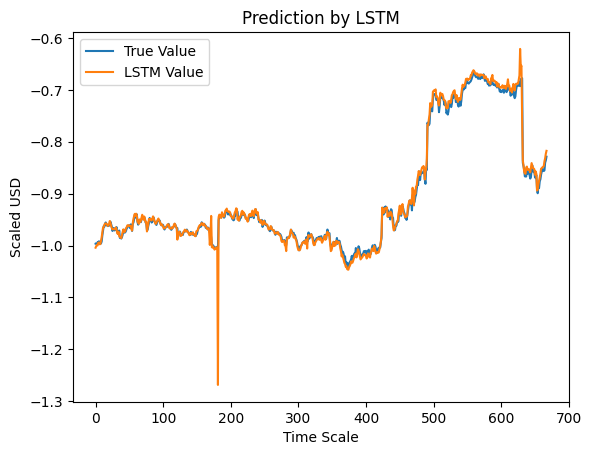

In [ ]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
print(len(X_train))

3345


In [ ]:

def forecast(n_past, n_days):
  prediction_next_days = []
  for i in range(n_days):
    last_sequence = X_train[i:-n_past+i, :]
    next_day_pred = lstm.predict(last_sequence)
    predicted_price = scaler.inverse_transform(next_day_pred)[0, 0]
    prediction_next_days.append(predicted_price)
  return prediction_next_days

predictions = forecast(60, 10)
def forecast_plot(stock_price, n_days):
  df = pd.DataFrame({'Day': list(range(1, n_days+1)), 'Stock Price': stock_price})
  fig = px.line(df, x='Day', y='Stock Price', title='Stock Prices for Next 10 Work Days')
  fig.update_layout(xaxis_title='Day', yaxis_title='Stock Price')
  fig.show()
forecast_plot(predictions, 10)

103/103 [==============================] - 0s 2ms/step
